# Метод Рунге-Кутта

Метод Рунге-Кутта для численного решения задачи Коши на отрезке $[x_0, x_0 + l]$:<br><br> $$u'(x) = f(x, u(x))$$ $$u(x_0) = u_o$$
<br>Сначала реализуем метод Рунге-Кутта второго порядка точности. Результатом работы алгоритма будет являться сеточная функция $y(x_i)$, определенная на сетке $x_i = x_0 + ih$, где $i \in \{0, ..., n\}$, а $h$ - фиксированный шаг. В нашем случае сетка равномерная и равна $h = \frac{l}{n}$, где $n$ - число шагов, которое подается на вход алгоритму.<br><br>
Метод Рунге-Кутта второго порядка точности предоставляет нам рекуррентные формулы для вычисления значения сеточной функции $y_i$: $$y_{i+1} = y_i + \left[(1-\alpha)f(x_i, y_i) + \alpha f(x_i + \frac{h}{2\alpha}), y_i + \frac{h}{2\alpha} f(x_i, y_i))\right]h$$<br>
В приведенном ниже решении $\alpha = \frac{1}{2}$. В этом случае формулы принимают вид: $$y_{i+1} = y_i + \frac{h}{2} \left[f(x_i, y_i) + f(x_i + h, y_i + hf(x_i, y_i))\right]$$<br>

In [2]:
# Подключаем нужные библиотеки
import numpy as np
import math
import pandas as pd
import matplotlib as plt
%matplotlib inline

Метод принимает на вход начальные условия задачи Коши $x_0, u_0$, функцию $f(x, u)$, длину отрезка $l$ и число шагов $n$.

In [3]:
def Runge_Kutta_method(x_0, y_0, f, l, n):
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        t = f(x_i, y_i) # промежуточное вычисление
        grid[x_0 + h*(i + 1)] = y_i + (h / 2) * (t + f(x_i + h, y_i + h*t))
    return grid

Проверим работу реализованного метода на задаче Коши, данной в условии:$$f(x, y) = 3 - y - x$$ $$y(0) = 0$$<br>Точным (аналитическим) решением данной задачи является функция $y(x) = 4 - x - 4e^{-x}$.

0.01859835469899629


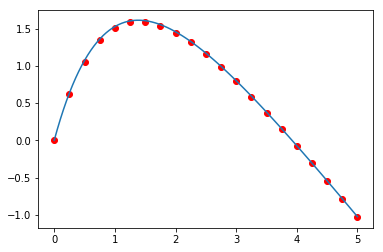

In [4]:
def func(x, y):
    return 3 - y - x

res = Runge_Kutta_method(0, 0, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 4 - true_solution - 4 * np.exp(-true_solution)) # график аналитического решения


difference = abs(solution[:, 1] - (4 - solution[:, 0] - 4 * np.exp(-solution[:, 0]))) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей

Как видим, найденная сеточная функция достаточно хорошо приближает аналитическое решение на отрезке $[0, 5]$.

Проверим работу метода на некоторых других тестах. 

**Задача Коши 1**: $$y'(x) = y(x)$$ $$y(0) = 1$$Очевидно, что её решением является функция $y(x) = e^x$. Проверим это.

6.285838747911612


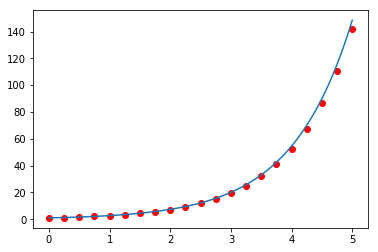

In [5]:
def func(x, y):
    return y

res = Runge_Kutta_method(0, 1, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(true_solution)) # график аналитического решения

difference = abs(solution[:, 1] - (np.exp(solution[:, 0]))) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей

**Задача Коши 2**: $$y'(x) = x^3+x+3\frac{y}{x}$$ $$y(1)=3$$При $x \geqslant 0$ её решением является функция $y(x) = x^4 - x^2 + 2x^3$. Проверим это.

39.37300258946266


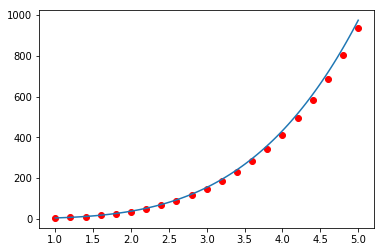

In [6]:
def func(x, y):
    return x * x * x + x + 3 * y / x

res = Runge_Kutta_method(1, 3, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.power(true_solution, 4) - np.power(true_solution, 2) + 3 * np.power(true_solution, 3))
# график аналитического решения

difference = abs(solution[:, 1] - (np.power(solution[:, 0], 4) - np.power(solution[:, 0], 2) + 3 * np.power(solution[:, 0], 3)))
print(np.amax(difference)) # максимум из модулей погрешностей

**Задача Коши 3**: $$y'(x) = -\frac{y}{x}$$ $$y(1)=1$$Аналитическим решением является функция $y=\frac{1}{x}$. Проверим работу алгоритма.

1.1102230246251565e-16


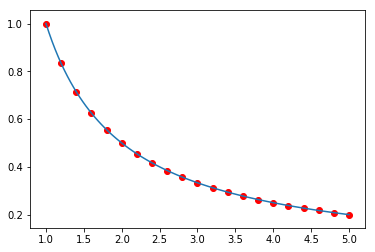

In [7]:
def func(x, y):
    return - y / x

res = Runge_Kutta_method(1, 1, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 1 / true_solution) # график аналитического решения

difference = abs(solution[:, 1] - (1 / solution[:, 0])) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей

Второй порядок точности лучше, чем первый, однако практика показывает, что этой точности также недостаточно. Наиболее часто при проведении реальных расчетов используется схема Рунге-Кутта четвертого порядка точности. Метод определяется формулами$$\frac{y_{i+1} - y_i}{h} = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$где $$k_1 = f(x_i, y_i),\quad k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_1)$$ $$k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_2), \quad k_4 = f(x_i + h, y_i + hk_3)$$Отсюда получаем рекуррентную формулу$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k4)$$

In [8]:
def Runge_Kutta_method_fourth(x_0, y_0, f, l, n):
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        
        k1 = f(x_i, y_i)
        k2 = f(x_i + (h / 2), y_i + (h / 2) * k1)
        k3 = f(x_i + (h / 2), y_i + (h / 2) * k2)
        k4 = f(x_i + h, y_i + h * k3)
        
        grid[x_0 + h*(i + 1)] = y_i + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return grid

Проверим работу метода на тех же примерах, которые были выше.

5.903294122511227e-05


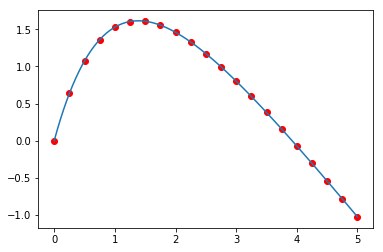

In [9]:
def func(x, y):
    return 3 - y - x

res = Runge_Kutta_method_fourth(0, 0, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 4 - true_solution - 4 * np.exp(-true_solution)) # график аналитического решения


difference = abs(solution[:, 1] - (4 - solution[:, 0] - 4 * np.exp(-solution[:, 0]))) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей

0.019624064388153784


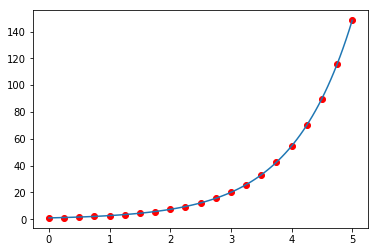

In [10]:
def func(x, y):
    return y

res = Runge_Kutta_method_fourth(0, 1, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(true_solution)) # график аналитического решения

difference = abs(solution[:, 1] - (np.exp(solution[:, 0]))) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей

0.338795288084043


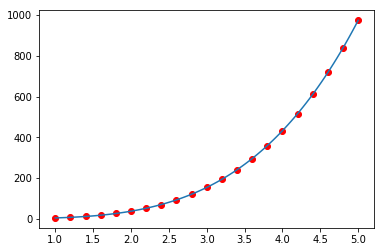

In [11]:
def func(x, y):
    return x * x * x + x + 3 * y / x

res = Runge_Kutta_method_fourth(1, 3, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.power(true_solution, 4) - np.power(true_solution, 2) + 3 * np.power(true_solution, 3))
# график аналитического решения

difference = abs(solution[:, 1] - (np.power(solution[:, 0], 4) - np.power(solution[:, 0], 2) + 3 * np.power(solution[:, 0], 3)))
print(np.amax(difference)) # максимум из модулей погрешностей

1.1102230246251565e-16


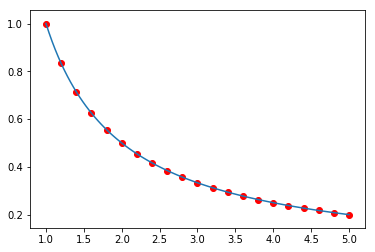

In [12]:
def func(x, y):
    return - y / x

res = Runge_Kutta_method_fourth(1, 1, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 1 / true_solution) # график аналитического решения

difference = abs(solution[:, 1] - (1 / solution[:, 0])) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей

Как видим, метод работает корректно на данном наборе тестов. Повышение точности можно увидеть, сравнив максимумы из модулей погрешностей.

## Метод Рунге-Кутта для решения систем 

Рассмотрим задачу Коши для нормальной системы дифференциальных уравнений $$y_1'(x) = f_1(x, y_1(x), y_2(x), ..., y_n(x))$$ $$y_2(x) = f_2(x, y_1(x), y_2(x), ..., y_n(x))$$ $$.$$ $$.$$ $$.$$ $$y_n'(x) = f_n(x, y_1(x), y_2(x), ..., y_n(x))$$ $$ y_1(x_0) = y_{1, 0}$$  $$y_2(x_0) = y_{2, 0}$$ $$.$$ $$.$$ $$.$$  $$y_n(x_0) = y_{n, 0}$$

В данном случае метод Рунге-Кутта также применим, однако теперь считаем $\mathbf{y}, \mathbf{f}, \mathbf{k_i}$ векторами из $\mathbb{R}^n$, где $n$ - число функций в системе.<br>Формулы остаются прежними $$\frac{y_{i+1} - y_i}{h} = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$где $$k_1 = f(x_i, y_i),\quad k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2} k_1)$$ $$k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_2), \quad k_4 = f(x_i + h, y_i + hk_3)$$Отсюда получаем рекуррентную формулу$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k4)$$

In [13]:
def Runge_Kutta_method_fourth_system(x_0, y_0, f, l, n):
    funcnum = y_0.shape[0]
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        
        k1 = np.empty(funcnum)
        k2 = np.empty(funcnum)
        k3 = np.empty(funcnum)
        k4 = np.empty(funcnum)
        
        for j in range(0, funcnum):
            k1[j] = f[j](x_i, y_i)
        
        for j in range(0, funcnum):
            k2[j] = f[j](x_i + (h / 2), y_i + (h / 2) * k1)
            
        for j in range(0, funcnum):
            k3[j] = f[j](x_i + (h / 2), y_i + (h / 2) * k2)
            
        for j in range(0, funcnum):
            k4[j] = f[j](x_i + h, y_i + h * k3)
        
        grid[x_0 + h*(i + 1)] = y_i + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return grid

Проверим работу программы на данной в условии системе $$x'(t) = 2.1y - x^2$$ $$y'(t) = e^{-x} + t + 2.1 y$$ $$x(0) = 1$$ $$y(0) = 0.25$$

In [14]:
def func1(x, vu):
    return 2.1 * vu[1] - vu[0] * vu[0]
def func2(x, vu):
    return math.exp(-vu[0]) + x + 2.1 * vu[1]

x_0 = 0
y_0 = np.array([1, 0.25])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 50)

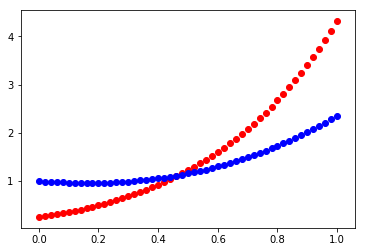

In [15]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

WolframAlpha не дает аналитического решения данной системы, так что проверим работу программы на других тестах.

**Пример 1.** $$y_1'(t) = -y_2(t)$$ $$y_2'(t) = y_1(t)$$ $$y_1(0) = 1$$ $$y_2(0) = 0$$Решением данной задачи Коши являются функции $$y_1(t) = \cos(t)$$ $$y_2(t) = \sin(t)$$

In [16]:
def func1(x, vu):
    return -vu[1]
def func2(x, vu):
    return vu[0]

x_0 = 0
y_0 = np.array([1, 0])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 3.14, 50)

4.063854963818822e-07
2.4194971248725494e-07


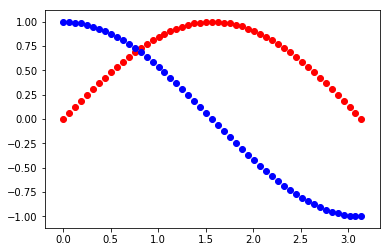

In [17]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

difference = abs(data[:, 1] - ( np.sin(data[:, 2]) )) # модули погрешностей для 1й функции
print(np.amax(difference)) # максимум из модулей погрешностей

difference = abs(data[:, 0] - ( np.cos(data[:, 2]) )) # модули погрешностей для 2й функции
print(np.amax(difference)) # максимум из модулей погрешностей

**Пример 2.** $$y_1'(t) = 2y_1 + 3y_2$$ $$y_2'(t) = 4y_1 - 2y_2$$ $$y_1(0) = 4$$ $$y_2(0) = 0$$Решением данной задачи Коши являются функции $$y_1(t) = 3e^{4t}+e^{-4t}$$ $$y_2(t) = 2e^{4t} - 2e^{-4t}$$

In [18]:
def func1(x, vu):
    return 2*vu[0] + 3*vu[1]
def func2(x, vu):
    return 4*vu[0] - 2*vu[1]

x_0 = 0
y_0 = np.array([4, 0])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 20)

0.004933924227998432
0.0073962684194555095


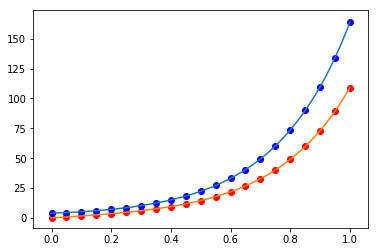

In [19]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 3*np.exp(4*true_solution) + np.exp(-4*true_solution)) # график y_1
true_solution = np.linspace(0, 1, 100) 
plt.pyplot.plot(true_solution, 2*np.exp(4*true_solution) - 2*np.exp(-4*true_solution)) # график y_2

difference = abs(data[:, 1] - (2*np.exp(4*data[:, 2]) - 2*np.exp(-4*data[:, 2]))) # модули погрешностей для 1й функции
print(np.amax(difference)) # максимум из модулей погрешностей

difference = abs(data[:, 0] - (3*np.exp(4*data[:, 2]) + np.exp(-4*data[:, 2]))) # модули погрешностей для 2й функции
print(np.amax(difference)) # максимум из модулей погрешностей

**Пример 3.** $$y_1'(t) = 2$$ $$y_2'(t) = y_1$$ $$y_1(0) = 0$$ $$y_2(0) = 0$$Решением данной задачи Коши являются функции $$y_1(t) = 2t$$ $$y_2(t) = t^2$$

In [20]:
def func1(x, vu):
    return 2
def func2(x, vu):
    return vu[0]

x_0 = 0
y_0 = np.array([0, 0])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 20)

1.1102230246251565e-16
4.440892098500626e-16


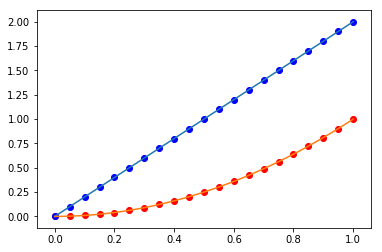

In [21]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 2*true_solution) # график y_1
true_solution = np.linspace(0, 1, 100) 
plt.pyplot.plot(true_solution, true_solution ** 2) # график y_2

difference = abs(data[:, 1] - (data[:, 2] ** 2)) # модули погрешностей для 1й функции
print(np.amax(difference)) # максимум из модулей погрешностей

difference = abs(data[:, 0] - (2 * data[:, 2])) # модули погрешностей для 2й функции
print(np.amax(difference)) # максимум из модулей погрешностей

**Пример 4.** $$x'=y$$ $$y'=x$$ $$x(0)=3$$ $$y(0)=1$$ Решением данной задачи Коши являются функции $=x(t)=e^{-t} + 2e^t$, $y(t)=2e^t-e^{-t}$

In [22]:
def func1(x, vu):
    return vu[1]
def func2(x, vu):
    return vu[0]

x_0 = 0
y_0 = np.array([3, 1])
f = [func1, func2]

x = Runge_Kutta_method_fourth_system(x_0, y_0, f, 1, 20)

2.9158152070607457e-07
2.5162932537625693e-07


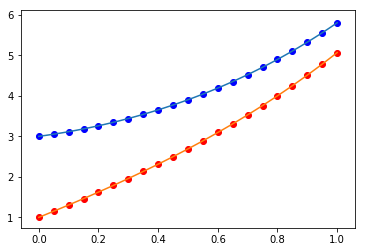

In [23]:
df = pd.DataFrame(x)
df = df.transpose()
df['index1'] = df.index
data = df.values
plt.pyplot.scatter(x = data[:, 2], y = data[:, 1], c = 'red') # строим график нашей сеточной функции
plt.pyplot.scatter(x = data[:, 2], y = data[:, 0], c = 'blue') # строим график нашей сеточной функции

true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(-true_solution) + 2*np.exp(true_solution)) # график y_1
true_solution = np.linspace(0, 1, 100) 
plt.pyplot.plot(true_solution, 2*np.exp(true_solution) - np.exp(-true_solution)) # график y_2

difference = abs(data[:, 1] - (2*np.exp(data[:, 2]) - np.exp(-data[:, 2]))) # модули погрешностей для 1й функции
print(np.amax(difference)) # максимум из модулей погрешностей

difference = abs(data[:, 0] - (np.exp(-data[:, 2]) + 2*np.exp(data[:, 2]))) # модули погрешностей для 2й функции
print(np.amax(difference)) # максимум из модулей погрешностей

Как видим, и с этой задачей численный метод справился с достаточной точностью.

# Решение краевой задачи для обыкновенного дифференциального уравнения второго порядка, разрешенного относительно старшей производной

Рассматривается линейное дифференциальное уравнение второго порядка вида$$y''(x) + p(x) y'(x) + q(x) y(x) = f(x),\quad x_0 < x < x_1$$с дополнительными условиями в граничных точках
$$
\begin{cases}\sigma_1 y(x_0) + \gamma_1 y'(x_0)= \delta_1 \\ \sigma_2 y(x_n) + \gamma_2 y'(x_n)= \delta_2 \end{cases}$$

Для решения этой задачи разностным методом будем аппроксимировать $y'(x)$ и $y''(x)$ соответственно разностными отношениями $$\frac{y_{i + 1} - y_{i - 1}}{2h}$$ и $$\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}$$Получим систему соотношений$$\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} + p(x_i)\frac{y_{i + 1} - y_{i - 1}}{2h} + q(x_i)y_i = f(x_i)$$Производя в них группировку, получаем $$y_{i-1}(\frac{1}{h^2} - \frac{p(x_i)}{2h}) + y_i(-\frac{2}{h^2} + q(x_i)) + y_{i+1}(\frac{1}{h^2} + \frac{p(x_i)}{2h}) = f(x_i) \quad i \in \{1, ..., n-1\}$$Записывая данную систему уравнений, получим трехдиагональную матрицу.<br>Аппроксимируя $y'(x)$ в краевых условиях соответствующими разностными отношениями, получим $$\begin{cases}y(x_0)(\sigma_1 - \frac{\gamma_1}{h}) + y(x_1)\frac{\gamma_1}{h} = \delta_1 \\ y(x_n)(\sigma_2 + \frac{\gamma_2}{h}) - y(x_{n-1})\frac{\gamma_2}{h} = \delta_2\end{cases}$$Это можно переписать как
$$\begin{cases}
y_0 = y_1 (-\frac{\gamma_1}{\sigma_1 h - \gamma_1}) + \frac{\delta_1}{\sigma_1 - \frac{\gamma_1}{h}}\\
y_{n-1} = y_n \frac{\sigma_2 h + \gamma_2}{\gamma_2} - \delta_2 \frac{h}{\gamma_2}
\end{cases}$$
Будем решать описанную выше трехдиагональную систему с краевыми условиями методом прогонки. Данный метод использует предположение о том, что искомые неизвестные связаны рекуррентными соотношениями$$y_i=\alpha_{i+1} y_{i+1} + \beta_{i+1}$$ Выполнив некоторые преобразования, получим $$\alpha_{i+1} = \frac{-B_i}{A_i \alpha_i + C_i} \quad \beta_{i+1} = \frac{F_i - A_i \beta_i}{A_i \alpha_i + C_i}$$где $$A_i y_{i-1} + C_i y + B_i y_{i+1} = F_i$$После вычисления прогоночных коэффициентов, решаем систему из 2 уравнений с неизвестными $y_n$ и $y_{n-1}$: одно из прогонки, а второе - краевое условие.

In [76]:
def method(x_0, x_n, p, q, f, sigma, gamma, delta, n):
    h = (x_n - x_0) / n # шаг сетки
    def A_coef(i):
        return (1 / (h ** 2)) - (p(x_0 + i*h) / (2 * h))
    def C_coef(i):
        return -(2 / (h ** 2)) + q(x_0 + i*h)
    def B_coef(i):
        return (1 / (h ** 2)) + (p(x_0 + i*h) / (2 * h))
    def F_coef(i):
        return f(x_0 + i*h)
    
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    
    # прогоночные коэффициенты
    
    alpha = np.empty(n + 1)
    beta = np.empty(n + 1)
    
    alpha[0] = 0 # нулевые коэффициенты - не используются
    beta[0] = 0 
    alpha[1] = -gamma[0] / (sigma[0] * h - gamma[0])
    beta[1] = delta[0] / (sigma[0] - (gamma[0] / h))
    
    for i in range(1, n): # вычисление прогоночных коэффициентов
        alpha[i + 1] = -B_coef(i) / (A_coef(i) * alpha[i] + C_coef(i))
        beta[i + 1] = (F_coef(i) - A_coef(i) * beta[i]) / (A_coef(i) * alpha[i] + C_coef(i))
    
    matrix = np.empty((2, 2)) # коэффициенты системы
    target = np.empty(2) # свободные члены
    
    matrix[0][0] = 1
    matrix[0][1] = -alpha[n]
    matrix[1][0] = 1
    matrix[1][1] = -(sigma[1] * h + gamma[1]) / gamma[1]
    target[0] = beta[n]
    target[1] = -delta[1] * h / gamma[1]
    sol = np.linalg.solve(matrix, target)
    grid[x_0 + n*h] = sol[1]
    grid[x_0 + (n - 1)*h] = sol[0]
    for i in range(n - 2, -1, -1):
        grid[x_0 + i * h] = alpha[i + 1] * grid[x_0 + (i + 1)*h] + beta[i + 1]
    return grid

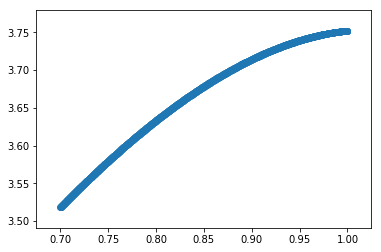

In [85]:
def p(x):
    return -3*x
def q(x):
    return 2
def f(x):
    return 1.5
res = method(0.7, 1, p, q, f, [0, 0.5], [1, 1], [1.3, 2], 1000)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
solution = solution[::-1] # переворачиваем массив
plt.pyplot.scatter(x=solution[:, 0], y=solution[:, 1])

WolframAlpha не дает адекватного аналитического решения этой задачи.

Проверим решение на краевой задаче$$y'' - y' = 0\\y(0)=-1\\y'(1) - y(1)=2$$Ее аналитическое решение $y(x) = e^x - 2$

0.0023376223134981


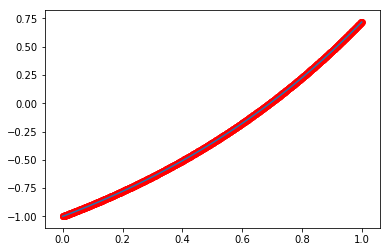

In [93]:
def p(x):
    return -1
def q(x):
    return 0
def f(x):
    return 0
res = method(0, 1, p, q, f, [1, -1], [0, 1], [-1, 2], 1000)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
solution = solution[::-1] # переворачиваем массив
plt.pyplot.scatter(x=solution[:, 0], y=solution[:, 1], color='red')
true_solution = np.linspace(0, 1, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(true_solution) - 2) # график y_1

difference = abs(solution[:, 1] - (np.exp(solution[:, 0]) - 2)) # модули погрешностей
print(np.amax(difference)) # максимум из модулей погрешностей